# Neural Network
 - Chapter 2까지 작업은 가중치 작업을 수동으로 해야했다. 
 - Neural Network부터는 자동으로 학습하는 능력을 알아 볼 것이다.
 - 입력층 -> 은닉층 -> 출력층 구조로 되어있다. 
 
 $y = 0 \ (b + w1x1 + w2x2 <=0)$ <br>
 $y = 1 \ (b + w1x1 + w2x2  > 0)$

## Activation Function 
 $a = b + w1x1 + w2x2$ <br>
 $ y = h(a) $
 
 - 임계값을 경계로 출력이 바뀌는 것을 Step function 이라고 한다. 

## 1. Sigmoid function 
 $ h(x) = 1 / (1 + exp(-x))  $ 
 - 출력 0~1

### 1.1 Compare with Step function and Sigmoid function

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

#### 1.1.1 Step function

In [3]:
# numpy array 지원 X
def step_function(x):
    if x>0:
        return 1
    else:
        return 0 

In [4]:
# numpy array 지원
def step_function(x):
    y = x>0
    return y.astype(np.int)

In [5]:
# more simple
def step_function(x):
    return np.array(x>0, dtype=np.int)

In [6]:
x = np.array([-1.0,1.0,2.0])
y = x>0
y

array([False,  True,  True], dtype=bool)

In [7]:
y.astype(np.int)

array([0, 1, 1])

(-0.1, 1.1)

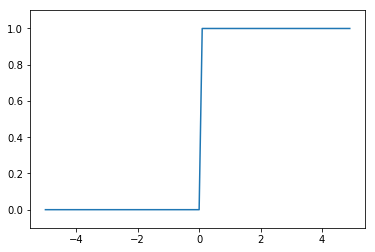

In [8]:
x = np.arange(-5, 5, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)

#### 1.1.2 Sigmoid function

In [9]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))


In [10]:
x1 = np.array([-1.0,1.0,2.0])
sigmoid(x1)

array([ 0.26894142,  0.73105858,  0.88079708])

(-0.1, 1.1)

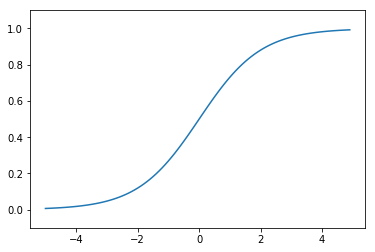

In [11]:
x1 = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(x1)
plt.plot(x1,y1)
plt.ylim(-0.1, 1.1)

### 1.1.3 Compare Two function
 - 두개 그래프 모두 비선형
 - 선형함수를 사용해서는 안된다. 선형함수를 사용한다면 신경망의 층을 깊게하는 의미가 없어진다.
 -  또한 신경망에서는 활성화 됐다 안됐다 라는 의미가 강하다.

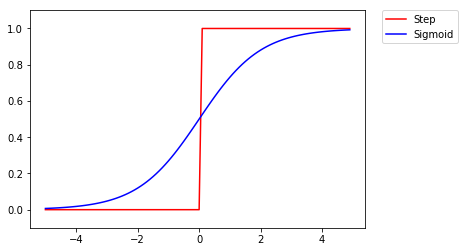

In [12]:
plt.plot(x,y,'r',label='Step')
plt.plot(x1,y1,'b', label='Sigmoid')
plt.ylim(-0.1, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)

## 2. reLU
 - $ h(x) = x ( x > 0) $
 - $ h(x) = 0 ( x <= 0 ) $


In [13]:
def relu(x):
    return np.maximum(0,x)

In [14]:
relu(x1)

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9])

## 3. Multi Demention Calculation

In [15]:
A = np.array([1,2,3,4])
A

array([1, 2, 3, 4])

In [16]:
np.ndim(A)

1

In [17]:
A.shape

(4,)

In [18]:
A.shape[0]

4

In [19]:
B = np.array([[1,2],[3,4],[5,6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [20]:
B.ndim

2

In [21]:
B.shape

(3, 2)

In [22]:
B.shape[0]

3

### 3.2 행렬의 내적(행렬의 곱)
![행렬의곱](img/1.jpg)

In [23]:
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [24]:
B = np.array([[5,6],[7,8]])
B

array([[5, 6],
       [7, 8]])

In [25]:
print(A.shape)
print(B.shape)

(2, 2)
(2, 2)


 - np.dot(A,B)와 np.dot(B,A)는 다른 값이 될 수 있다. 

In [26]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

 - 2 x 3
 - 3 x 2

In [27]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])

In [28]:
A.shape

(2, 3)

In [29]:
B.shape

(3, 2)

In [30]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [31]:
np.dot(B,A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

In [32]:
C = np.array([[1,2],[3,4]])
C

array([[1, 2],
       [3, 4]])

In [33]:
C.shape

(2, 2)

 - 2x3 과 2x2 오류 

In [34]:
np.dot(A,C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

### 행렬의 곱에서는 대응하는 차원의 원소수를 일치 
$ 3 x 2 (A)$    x    $2 x 4(B)$ = $3 x 4 (C)$

- A가 2차원, B가 1차원일때도 대응하는 차원의 원소수를 일치시켜라. 
 - $ 3x2(A) $ x $2(B)$ = $3(C)$

In [35]:
A = np.array([[1,2],[3,4],[5,6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [36]:
B = np.array([7,8])
B

array([7, 8])

In [37]:
A.shape

(3, 2)

In [38]:
B.shape

(2,)

In [39]:
np.dot(A,B)

array([23, 53, 83])

### 3.3 신경망의 내적 
![신경망](img/3.jpg)

In [40]:
X = np.array([1,2])
print(X)
print(X.shape)

[1 2]
(2,)


In [41]:
W = np.array([[1,3,5],[2,4,6]])
W

array([[1, 3, 5],
       [2, 4, 6]])

In [42]:
W.shape

(2, 3)

In [43]:
Y = np.dot(X,W)
Y

array([ 5, 11, 17])

### 3.4 3층 신경망 구현하기. 
<img src="img/2.jpg" width=500>

### 중요한 표기 
<img src="img/4.jpg" width=500>
<img src="img/5.jpg" width=500>

$$a_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1^{(1)}$$
$$ Simple -> A^{(1)} = XW^{(1)} + B^{(1)}$$

<img src="img/9.PNG" width=500>

In [44]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

In [45]:
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [46]:
A1 = np.dot(X,W1) + B1
A1

array([ 0.3,  0.7,  1.1])

<img src="img/6.jpg" width=500>

In [47]:
Z1 = sigmoid(A1)
Z1

array([ 0.57444252,  0.66818777,  0.75026011])

<img src="img/7.jpg" width=500>

In [48]:
W2 = np.array([[.1,.4],[.2,.5],[.3,.6]])
W2

array([[ 0.1,  0.4],
       [ 0.2,  0.5],
       [ 0.3,  0.6]])

In [49]:
B2 = np.array([.1,.2])
B2

array([ 0.1,  0.2])

In [50]:
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [51]:
A2 = np.dot(Z1,W2) + B2
A2

array([ 0.51615984,  1.21402696])

In [52]:
Z2 = sigmoid(A2)
Z2

array([ 0.62624937,  0.7710107 ])

<img src="img/8.jpg" width=500>

In [53]:
def identity_function(x):
    return x

In [54]:
W3 = np.array([[.1,.3],[.2,.4]])
B3 = np.array([.1,.2])

A3 = np.dot(Z2,W3) + B3
A3

array([ 0.31682708,  0.69627909])

In [55]:
Y = identity_function(A3)
Y

array([ 0.31682708,  0.69627909])

### 구현정리 

In [56]:
def init_network():
    network = {}
    network['W1'] = np.array([[1,3,5],[2,4,6]]) / 10
    network['b1'] = np.array([1,2,3]) / 10 
    network['W2'] = np.array([[1,4],[2,5],[3,6]]) / 10
    network['b2'] = np.array([1,2]) / 10
    network['W3'] = np.array([[1,3],[2,4]]) / 10
    network['b3'] = np.array([1,2]) / 10
    return network

In [57]:
def forward(network, x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = identity_function(a3)
    
    return y

In [58]:
network = init_network()

In [59]:
x = np.array([1,5]) / 10
y = forward(network,x)
print(y)

[ 0.31234736  0.6863161 ]


## 3.5 출력층 설계 
 - 신경망은 Regression과 Classification 모두 가능하나, Output layer에서 어떠한 Function으로 출력하느냐에 따라 결과가 달라진다. 
 - Regression : $Identity function$
 - Classification : $Softmax Function $
 - $ Identity function : $ 입력을 그대로 출력(입력과 출력이 항상 같다는 뜻). 
 - $ Softmax  function : $ ${y_k} = {{exp(a_k)}\over{\sum_{i=1}^{n}exp(ai)}}$ 
  - 즉, 모양이 확률형태로 나온다. 해당 값/전체 값
  
<img src="https://camo.githubusercontent.com/a443fe7e4e78e6f7cda8c14d2c33cc69c51d732e/687474703a2f2f692e696d6775722e636f6d2f4b4f78375338472e706e67" width = 500>

### 3.5.1 Softmax 구현

In [60]:
a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a)

In [61]:
exp_a

array([  1.34985881,  18.17414537,  54.59815003])

In [62]:
sum_exp_a = np.sum(exp_a)
sum_exp_a

74.122154210163302

In [63]:
y = exp_a / sum_exp_a
y

array([ 0.01821127,  0.24519181,  0.73659691])

In [64]:
np.sum(y)

1.0

In [65]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

### 3.5.2 구현 중 주의사항 
 - Overflow를 주의.
 - 값이 커짐에 따라서 지수의 N은 무한대로 커질 수 있다.
 - 책 p.93 확인 
  - max값을 값에서 빼어 softmax를 구현 

In [66]:
a = np.array([1010,1000,990])
a

array([1010, 1000,  990])

In [67]:
 np.exp(a) / np.sum(np.exp(a)) # overflow

C:\ProgramData\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


array([ nan,  nan,  nan])

In [68]:
np.exp(a - np.max(a)) / np.sum(np.exp(a- np.max(a)))

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

#### 최종 softmax 구현 
### 3.5.3 Softmax 함수 특징
 - 함수의 출력은 0 ~ 1 사이 실수 
 - 총합은 1 
 - 함수의 출력을 확률로 해석 가능. 

In [69]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [70]:
a = np.array([0.3,2.9,4.0])
y = softmax(a) # 즉, argument max인 것이다. 
y

array([ 0.01821127,  0.24519181,  0.73659691])

In [71]:
np.sum(y)

1.0

### 3.5.3 출력층 뉴런 수 정하기 
 - 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적.
 - 0~9 중 하나로 분류하는 문제라면 뉴런을 10개로 설정 

## 3.6 손글씨 숫자 인식 ( MNIST )
 - 여기선 학습을 생략하고 추론 과정만 구현 
  - 신경망의 순전파(Forward propagation)

### 3.6.1 DataSets
 - 60,000 Train Sets
 - 10,000 Test Sets
 - 28x28 회색조 이미지 
 - 픽셀은 0~255 값.

In [72]:
import sys,os

In [73]:
from dataset.mnist import load_mnist

 - 처음 조금은 오랜 시간이 걸릴지 모른다.
 - normalize : 입력 이미지의 픽셀 값을 0.0 ~ 1.0 으로 정규화 할지 정한다. 
 - flatten : 28 x 28 x 1인 3차원 배열로 출력을 할 것인지 아닌지 정한다. True => 1차원 배열로 784개 원소로 이뤄진 1차원 배열 

In [74]:
(x_train, y_train),(x_test,y_test) = load_mnist(flatten=True, normalize=False) 
# flatten = 이미지는 1차원 배열로 쭉 펼쳐졌다는 의미, Normalize  : 정규화 과정이 False 즉, max값으로 나눈 값이 나오지 않고 그대로 출력 

In [75]:
print(x_train.shape) # 60000개 데이터 784 => 28 x 28
print(y_train.shape)
print(x_test.shape) # 10000개 데이터 28x28
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [76]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### MNIST SHOW

In [77]:
from PIL import Image
import numpy as np

In [78]:
%matplotlib inline

In [79]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [80]:
img = x_train[0]
label = y_train[0]
print(label)  # 5

5


In [81]:
print(img.shape)  # (784,)

(784,)


In [82]:
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형

In [83]:
print(img.shape)  # (28, 28)

(28, 28)


In [84]:
img_show(img)

![img10](img/10.PNG)

### 3.6.2 신경망 추론 처리 
 - 입력 : 784개
 - 출력 : 10개 인 뉴런으로 구성 
 - 입력이 784개인 이유는 28 x 28 = 784이기 때문이이다. 출력이 10 인 이유는 0~9까지 숫자 이기때문.
 - 은닉층은 총 2개로 첫번째는 50개 뉴런 두번째는 100개 뉴런을 배치 : 임의로 선정

In [85]:
import pickle

In [86]:
def get_data():
    (x_train, t_train),(x_test,t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test,t_test

In [87]:
def init_network():
    with open("sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
        
    return network

In [88]:
def predict(network,x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [89]:
x, t = get_data()

In [90]:
network = init_network()

In [91]:
len(network['W1'])

784

In [92]:
len(network['W2'])

50

In [93]:
len(network['W3'])

100

In [94]:
accuracy_cnt = 0

In [95]:
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

In [96]:
print("Accuracy : " + str(float(accuracy_cnt)/len(x)))

Accuracy : 0.9352


## Batch 처리 

In [100]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [103]:
x.shape

(10000, 784)

In [104]:
x[0].shape

(784,)

In [105]:
W1.shape

(784, 50)

In [106]:
W2.shape

(50, 100)

In [107]:
W3.shape

(100, 10)

In [108]:
from IPython.display import Image

### 신경망 각층의 배열 형상 추이 
 - 28 x 28 인 784 데이터를 1개만 입력하였을떄의 모양이다. 

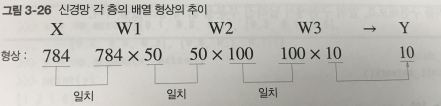

In [109]:
Image(filename="./img/11.PNG", width=500)

### 배치 처리를 위한 배열들의 형상 추이 
 - 이미지를 여러장 한꺼번에 입력하는 경우 
 - 100개를 묶어 predict함수에 한번에 넘기면 아래와 같은 형태로 표현된다. 
 - Output : 100 x 10
  - x[0]과 y[0]에는 0 번째 이미지. 
  - x[1]과 y[1]에는 1 번째 이미지.

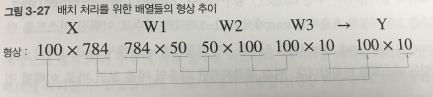

In [110]:
Image(filename="./img/12.PNG", width=500)

### 배치 형태로 재 구현 

In [112]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0,len(x), batch_size):
    x_batch = x[i:i+batch_size] # 100장씩 묶여서 이동
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch,axis=1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

In [113]:
print("Accuracy : " + str(float(accuracy_cnt)/len(x)))

Accuracy : 0.9352


#### np.argmax출력 

In [118]:
x = np.array([[0.1,0.8,0.1],[0.3,0.1,0.6],[0.2,0.5,0.3], [0.8,0.1,0.1]])
x

array([[ 0.1,  0.8,  0.1],
       [ 0.3,  0.1,  0.6],
       [ 0.2,  0.5,  0.3],
       [ 0.8,  0.1,  0.1]])

In [119]:
y = np.argmax(x, axis=1)
y

array([1, 2, 1, 0], dtype=int32)

#### np.sum 출력

In [120]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])

In [121]:
print(y==t)

[ True  True False  True]


In [122]:
np.sum(y==t)

3